**Grupo 2**

**Integrantes:**

1. Aviles Ferro, Richard

2. Chuquimantari Villegas, Freddy

3. Huallipe Menez, Carlo

In [2]:
#importamos librerias
import sys
import warnings
warnings.filterwarnings("ignore")
from subprocess import check_output
#lectura de datos
import pandas as pd
import numpy as np
import random as rd
import time
#graficas
import seaborn as sns
import matplotlib.pyplot as plt

#modelo machine learning
from sklearn import model_selection,feature_selection,metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

import random

In [3]:
#datos
data_original=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")
data_copy=data_original.copy(deep=True)
data_combinada=[data_copy,data_test]

In [4]:
list(data_original.columns.values)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

**Diccionario de datos**

| Variable | Definición | 
| --- | --- |
| PassengerId | Identificador |
| Survived | Sobrevivientes |
| Pclass | Categoría social |
| Name | Nombre del pasajero |
| Sex | Sexo del pasajero |
| Age | Edad del pasajero |
| SibSp | Número de hermanos/cónyugues a bordo |
| Parch | Número de padres/hijos a bordo |
| Ticket | Código de ticket |
| Fare | Tarifa del ticket |
| Cabin | Código de cabina |
| Embarked | Puerto de embarque |

**Imputacion de datos**

In [5]:
data_original.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data_original.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
data_original.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_test.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [9]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
for data in data_combinada:
    #Completando datos con la mediana
    data["Age"].fillna(data["Age"].median(),inplace=True)
    #completando datos con la moda
    data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)
    #completandon datos con la mediana
    data["Fare"].fillna(data["Fare"].median(),inplace=True)
#elimanamos datos que no son necesarios
datos_eliminar=["PassengerId","Cabin","Ticket"]
data_copy.drop(datos_eliminar,axis=1,inplace=True)

In [11]:
data_copy.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [12]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [13]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
for data in data_combinada:
    data["TamFamilia"]=data["SibSp"]+data["Parch"]+1
    data["IsAlone"]=1
    data["IsAlone"].loc[data["TamFamilia"]>1]=0
    data["Titulo"]=data["Name"].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
    data["FareBin"]=pd.qcut(data["Fare"],4)
    data["AgeBin"]=pd.cut(data["Age"].astype(int), 5)
cantidad_minima=10
name_titulo=(data_copy["Titulo"].value_counts()<cantidad_minima)
#print(name_titulo)
data_copy["Titulo"]=data_copy["Titulo"].apply(lambda x: "Misc" if name_titulo.loc[x]==True else x)
data_copy["Titulo"].value_counts()

Titulo
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64

In [15]:
data_copy

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,TamFamilia,IsAlone,Titulo,FareBin,AgeBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]"
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]"
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"


In [16]:
data_copy.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
TamFamilia    0
IsAlone       0
Titulo        0
FareBin       0
AgeBin        0
dtype: int64

In [17]:


etiqueta=LabelEncoder()
for data in data_combinada:
    data["SexCode"]=etiqueta.fit_transform(data["Sex"])
    data["EmbarkedCode"]=etiqueta.fit_transform(data["Embarked"])
    data["TituloCode"]=etiqueta.fit_transform(data["Titulo"])
    data["AgeBinCode"]=etiqueta.fit_transform(data["AgeBin"])
    data["FareBinCode"]=etiqueta.fit_transform(data["FareBin"])
objetivo=["Survived"]
#data1 variables de la data original
data1=['Sex','Pclass', 'Embarked', 'Titulo','SibSp', 'Parch', 'Age', 'Fare', 'TamFamilia', 'IsAlone']
data2=["SexCode","Pclass","EmbarkedCode","TituloCode",'SibSp','Parch', 'Age', 'Fare']
data3=objetivo+data2

data4=["SexCode","Pclass","EmbarkedCode","TituloCode","TamFamilia","AgeBinCode","FareBinCoce"]
data5=objetivo+data4
data1_x_bin=["SexCode","Pclass","EmbarkedCode","TituloCode","TamFamilia","AgeBinCode","FareBinCode"]
data1_xy_bin=objetivo+data1_x_bin

In [18]:
data1_dummy=pd.get_dummies(data_copy[data1])
data1_dummy

,Pclass,SibSp,Parch,Age,Fare,TamFamilia,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Titulo_Master,Titulo_Misc,Titulo_Miss,Titulo_Mr,Titulo_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,1,1,False,True,False,False,True,False,True,False,False,False
887,1,0,0,19.0,30.0000,1,1,True,False,False,False,True,False,False,True,False,False
888,3,1,2,28.0,23.4500,4,0,True,False,False,False,True,False,False,True,False,False
889,1,0,0,26.0,30.0000,1,1,False,True,True,False,False,False,False,False,True,False


In [19]:
data_copy.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
TamFamilia      0
IsAlone         0
Titulo          0
FareBin         0
AgeBin          0
SexCode         0
EmbarkedCode    0
TituloCode      0
AgeBinCode      0
FareBinCode     0
dtype: int64

In [20]:
data_test.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin           327
Embarked          0
TamFamilia        0
IsAlone           0
Titulo            0
FareBin           0
AgeBin            0
SexCode           0
EmbarkedCode      0
TituloCode        0
AgeBinCode        0
FareBinCode       0
dtype: int64

In [21]:
data_original.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [22]:
entrada1_x,test1_x,entrada1_y,test1_y=model_selection.train_test_split(data_copy[data2],data_copy[objetivo],random_state=0)
entrada1_x

,SexCode,Pclass,EmbarkedCode,TituloCode,SibSp,Parch,Age,Fare
105,1,3,2,3,0,0,28.0,7.8958
68,0,3,2,2,4,2,17.0,7.9250
253,1,3,2,3,1,0,30.0,16.1000
320,1,3,2,3,0,0,22.0,7.2500
706,0,2,2,4,0,0,45.0,13.5000
...,...,...,...,...,...,...,...,...
835,0,1,0,2,1,1,39.0,83.1583
192,0,3,2,2,1,0,19.0,7.8542
629,1,3,1,3,0,0,28.0,7.7333
559,0,3,2,4,1,0,36.0,17.4000


In [23]:
for i in data1:
    if data_copy[i].dtype!="float64":
        print(f"Correlecacion de sobrevivientes para ",i)
        print(data_copy[[i,objetivo[0]]].groupby(i,as_index=False).mean())

Correlecacion de sobrevivientes para  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
Correlecacion de sobrevivientes para  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
Correlecacion de sobrevivientes para  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
Correlecacion de sobrevivientes para  Titulo
   Titulo  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
Correlecacion de sobrevivientes para  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
Correlecacion de sobrevivientes para  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
Correlecacion de sobrevivientes para  TamFamilia
   TamFamilia  Survived
0           

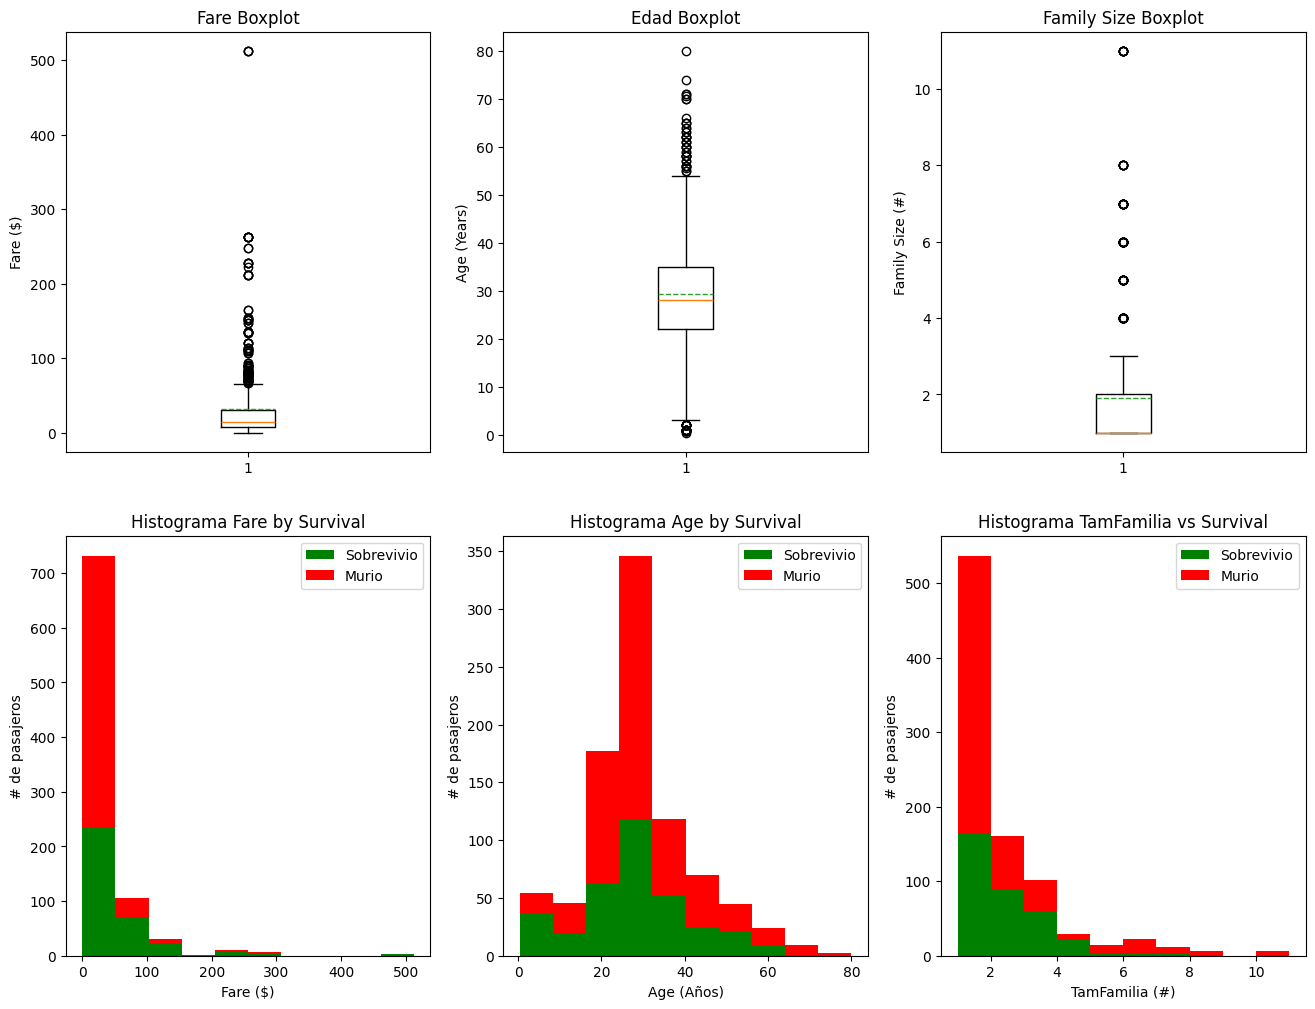

In [24]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data_copy['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data_copy['Age'], showmeans = True, meanline = True)
plt.title('Edad Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data_copy['TamFamilia'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size (#)')

plt.subplot(234)
plt.hist(x = [data_copy[data_copy['Survived']==1]['Fare'], data_copy[data_copy['Survived']==0]['Fare']], 
         stacked=True, color = ['g','r'],label = ['Sobrevivio','Murio'])
plt.title('Histograma Fare by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# de pasajeros')
plt.legend()

plt.subplot(235)
plt.hist(x = [data_copy[data_copy['Survived']==1]['Age'], data_copy[data_copy['Survived']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Sobrevivio','Murio'])
plt.title('Histograma Age by Survival')
plt.xlabel('Age (Años)')
plt.ylabel('# de pasajeros')
plt.legend()

plt.subplot(236)
plt.hist(x = [data_copy[data_copy['Survived']==1]['TamFamilia'], data_copy[data_copy['Survived']==0]['TamFamilia']], 
         stacked=True, color = ['g','r'],label = ['Sobrevivio','Murio'])
plt.title('Histograma TamFamilia vs Survival')
plt.xlabel('TamFamilia (#)')
plt.ylabel('# de pasajeros')
plt.legend()

<Axes: xlabel='TamFamilia', ylabel='Survived'>

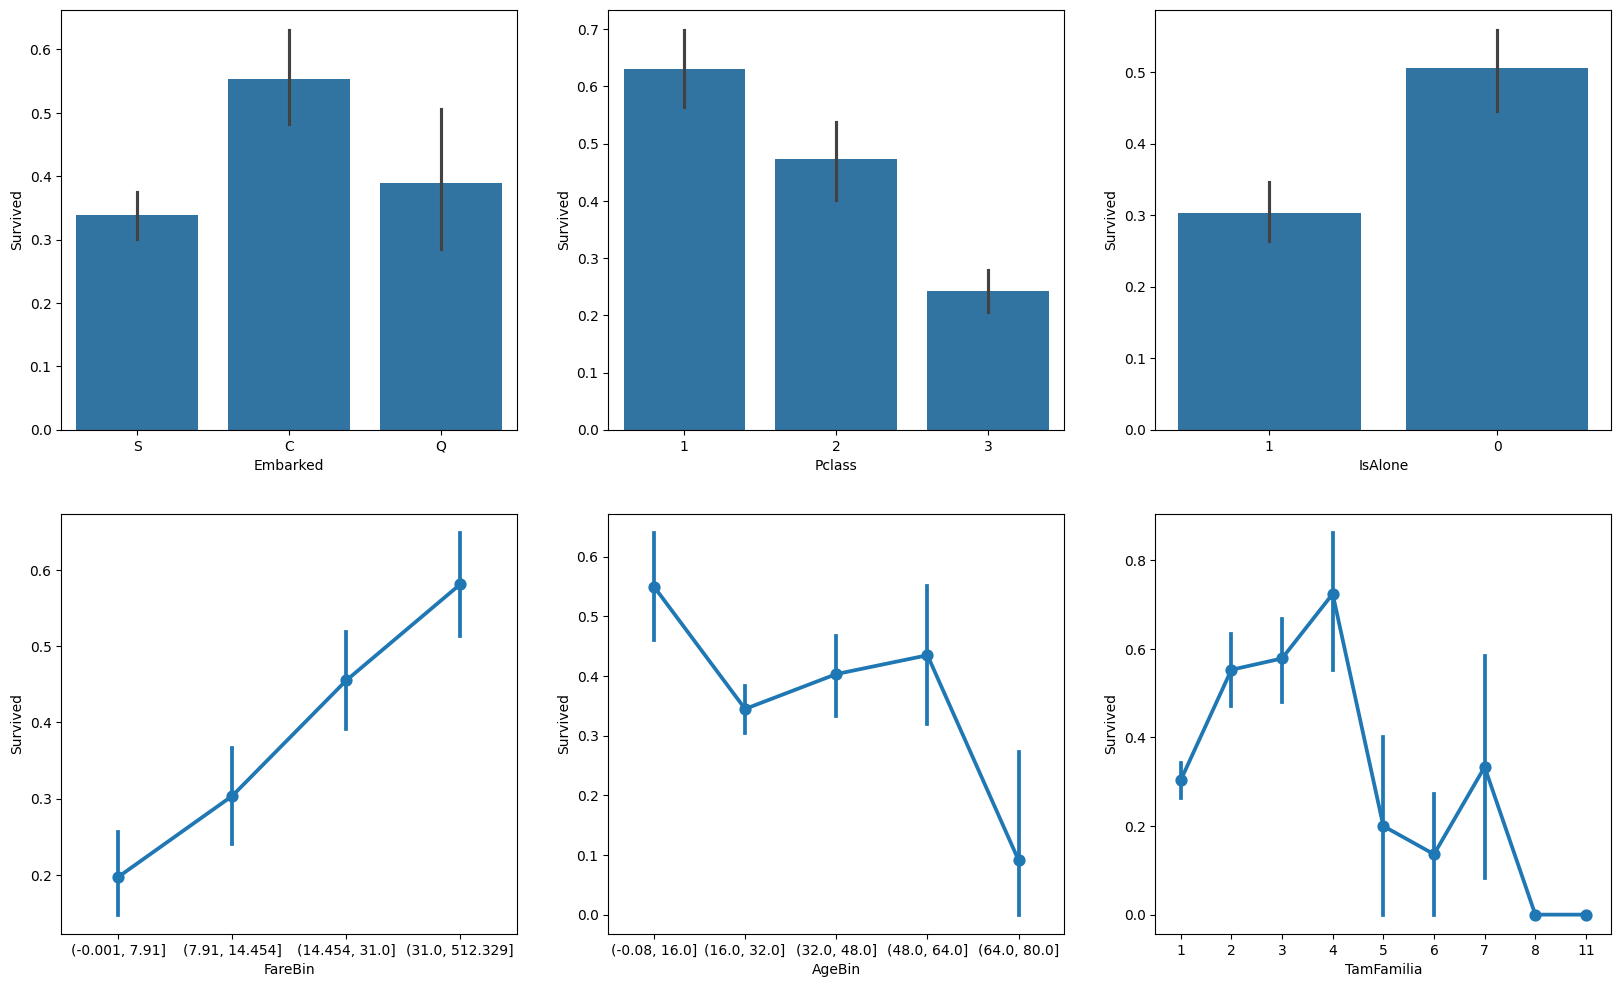

In [25]:
fig, saxis = plt.subplots(2, 3,figsize=(20,12))

sns.barplot(x = 'Embarked', y = 'Survived', data=data_copy, ax = saxis[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=data_copy, ax = saxis[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order=[1,0], data=data_copy, ax = saxis[0,2])

sns.pointplot(x = 'FareBin', y = 'Survived',  data=data_copy, ax = saxis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data_copy, ax = saxis[1,1])
sns.pointplot(x = 'TamFamilia', y = 'Survived', data=data_copy, ax = saxis[1,2])

Text(0.5, 1.0, 'Comparación de Sobrevimientes: Pclass vs TamFamilia')

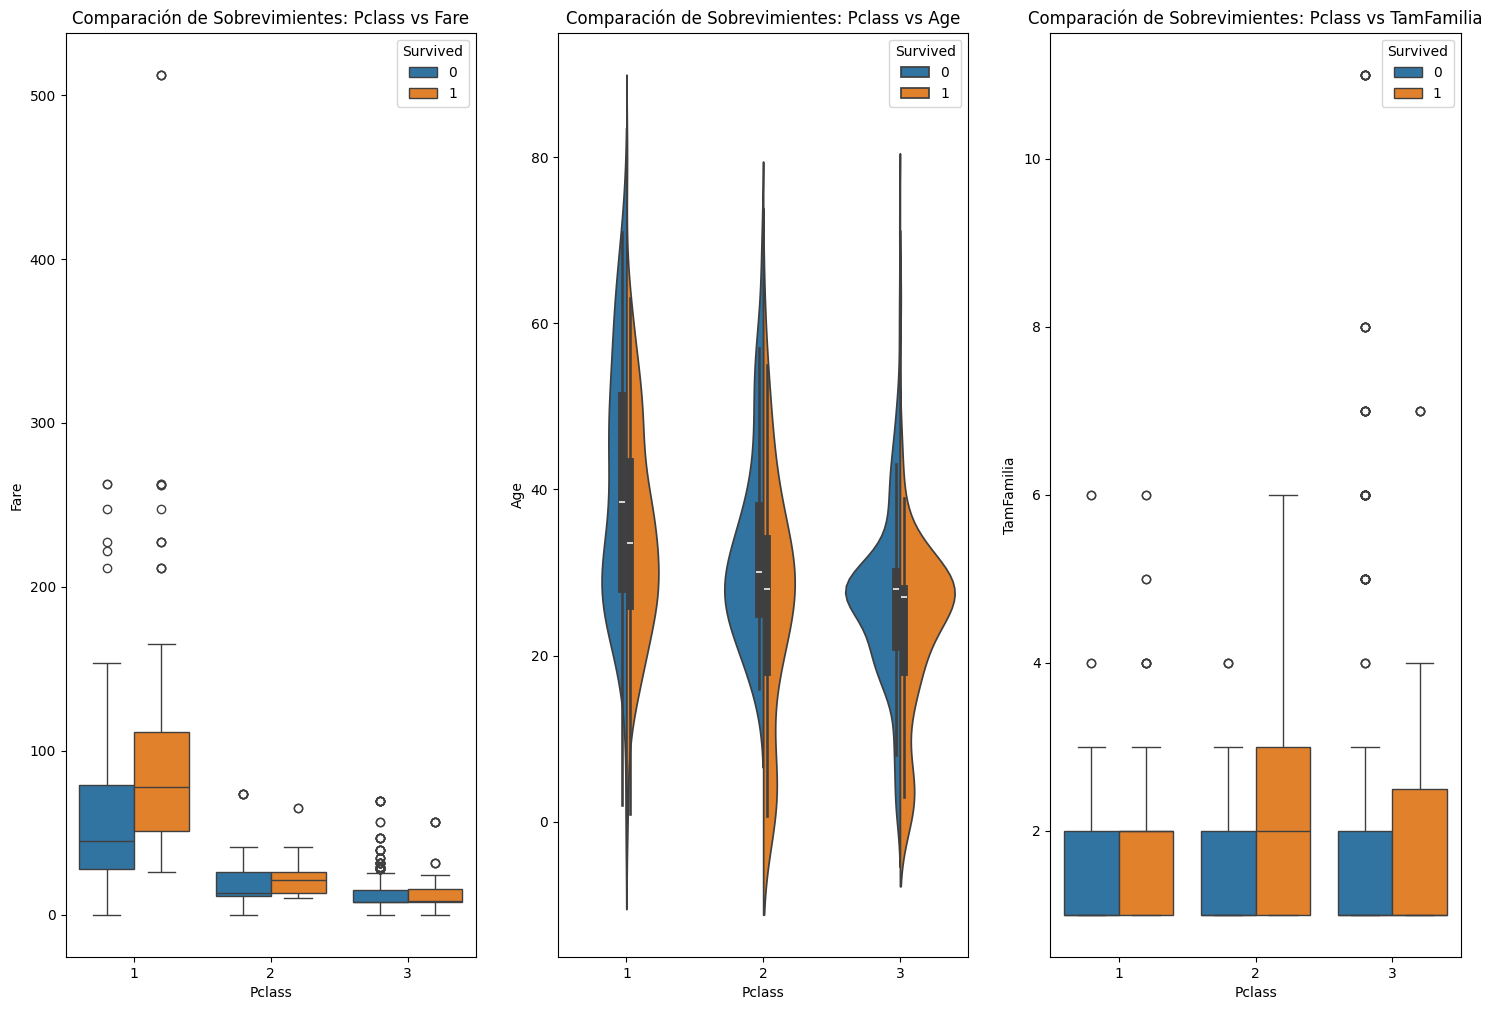

In [26]:
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(18,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data_copy, ax = axis1)
axis1.set_title('Comparación de Sobrevimientes: Pclass vs Fare')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data_copy, split = True, ax = axis2)
axis2.set_title('Comparación de Sobrevimientes: Pclass vs Age')

sns.boxplot(x = 'Pclass', y ='TamFamilia', hue = 'Survived', data = data_copy, ax = axis3)
axis3.set_title('Comparación de Sobrevimientes: Pclass vs TamFamilia')

Text(0.5, 1.0, 'Comparación de Sobrevimientes: Sex vs IsAlone')

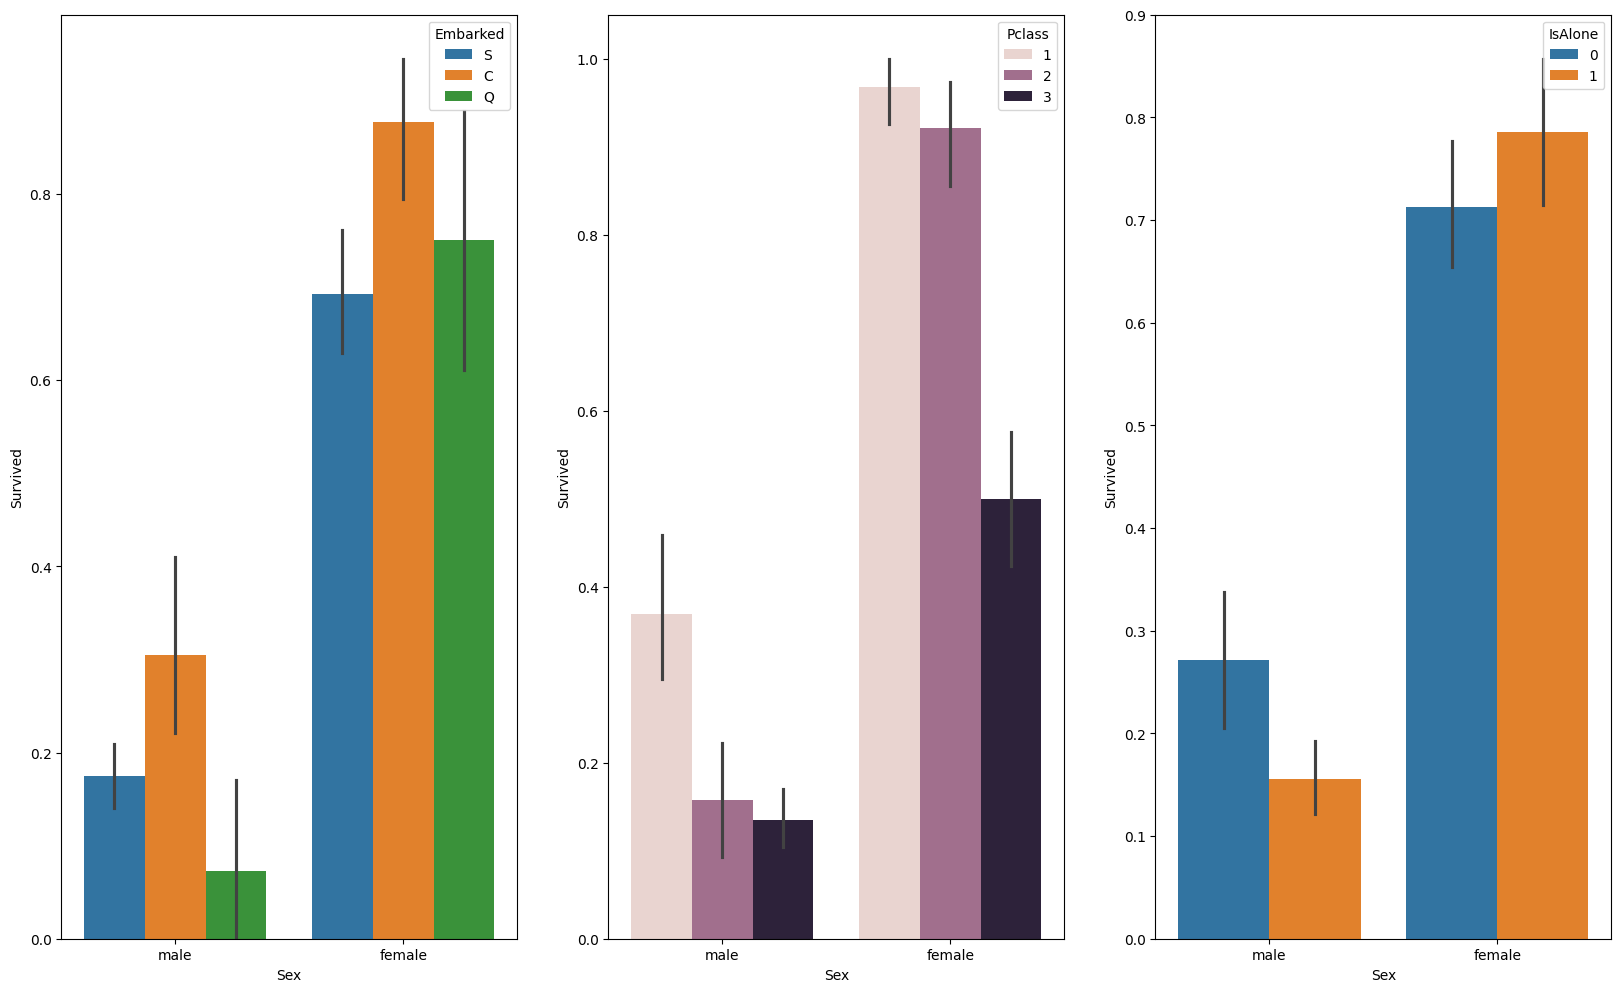

In [27]:
fig, qaxis = plt.subplots(1,3,figsize=(20,12))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data_copy, ax = qaxis[0])
axis1.set_title('Comparación de Sobrevimientes: Sex vs Embarked')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data_copy, ax  = qaxis[1])
axis1.set_title('Comparación de Sobrevimientes: Sex vs Pclass')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data_copy, ax  = qaxis[2])
axis1.set_title('Comparación de Sobrevimientes: Sex vs IsAlone')

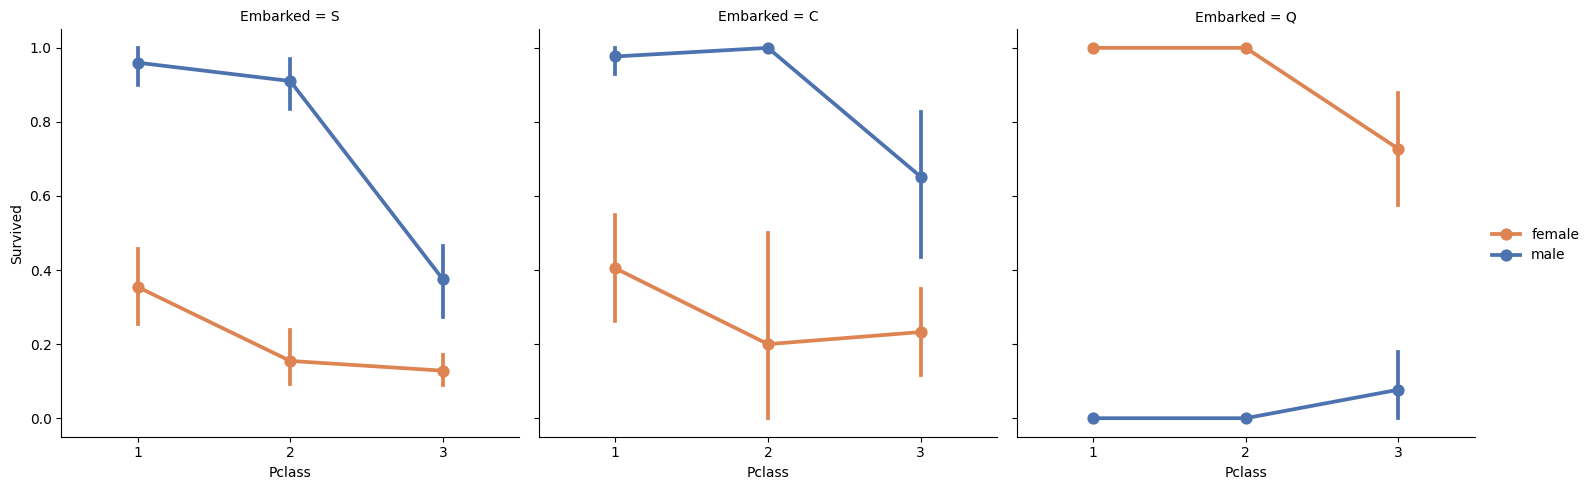

In [28]:
e = sns.FacetGrid(data_copy, col = 'Embarked',height=5)
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()


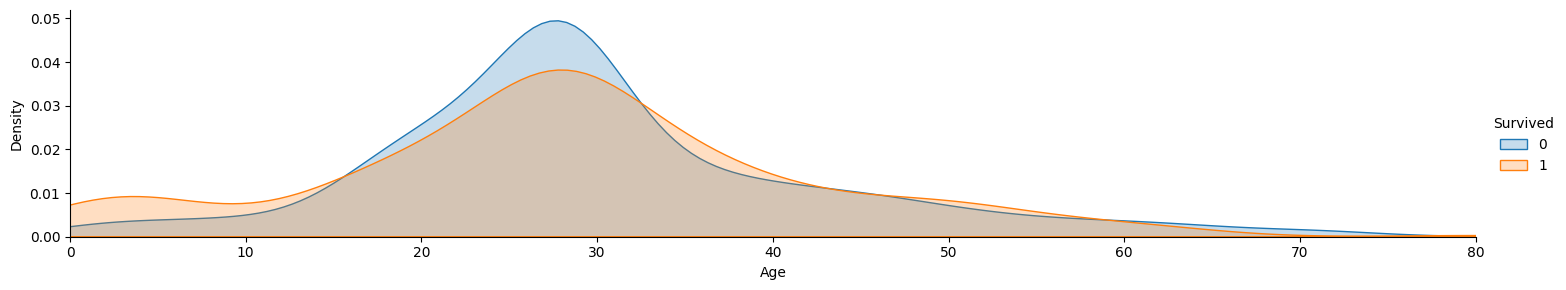

In [29]:
a = sns.FacetGrid( data_copy, hue = 'Survived', aspect=5 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , data_copy['Age'].max()))
a.add_legend()

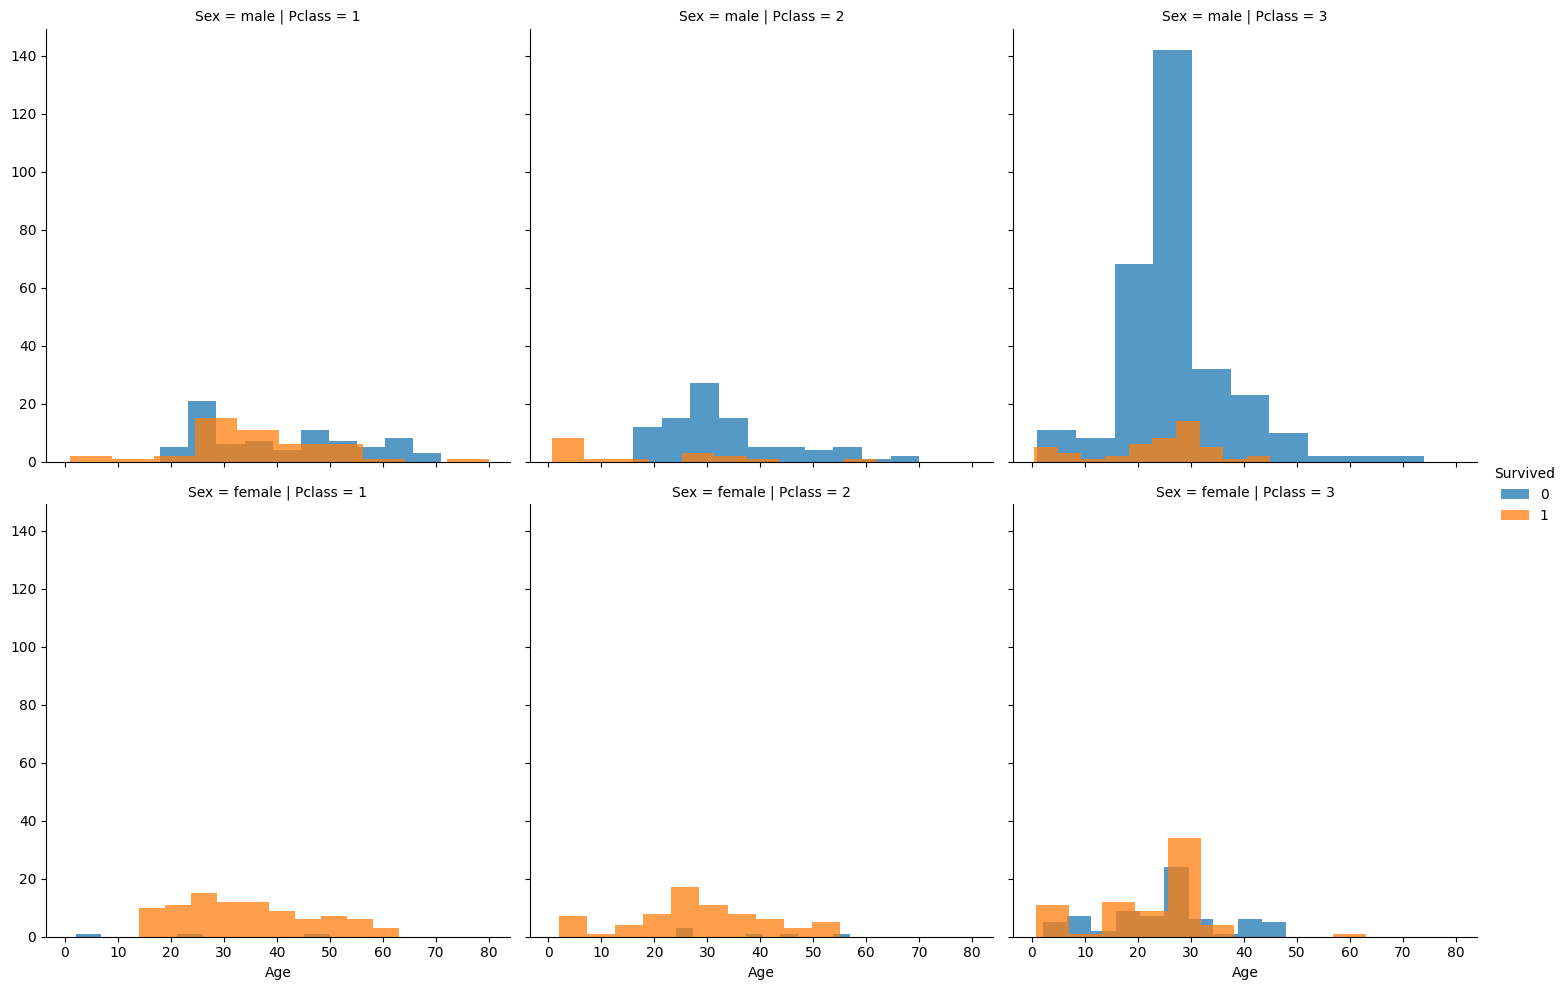

In [30]:
h = sns.FacetGrid(data_copy, row = 'Sex', col = 'Pclass', hue = 'Survived',height=5)
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

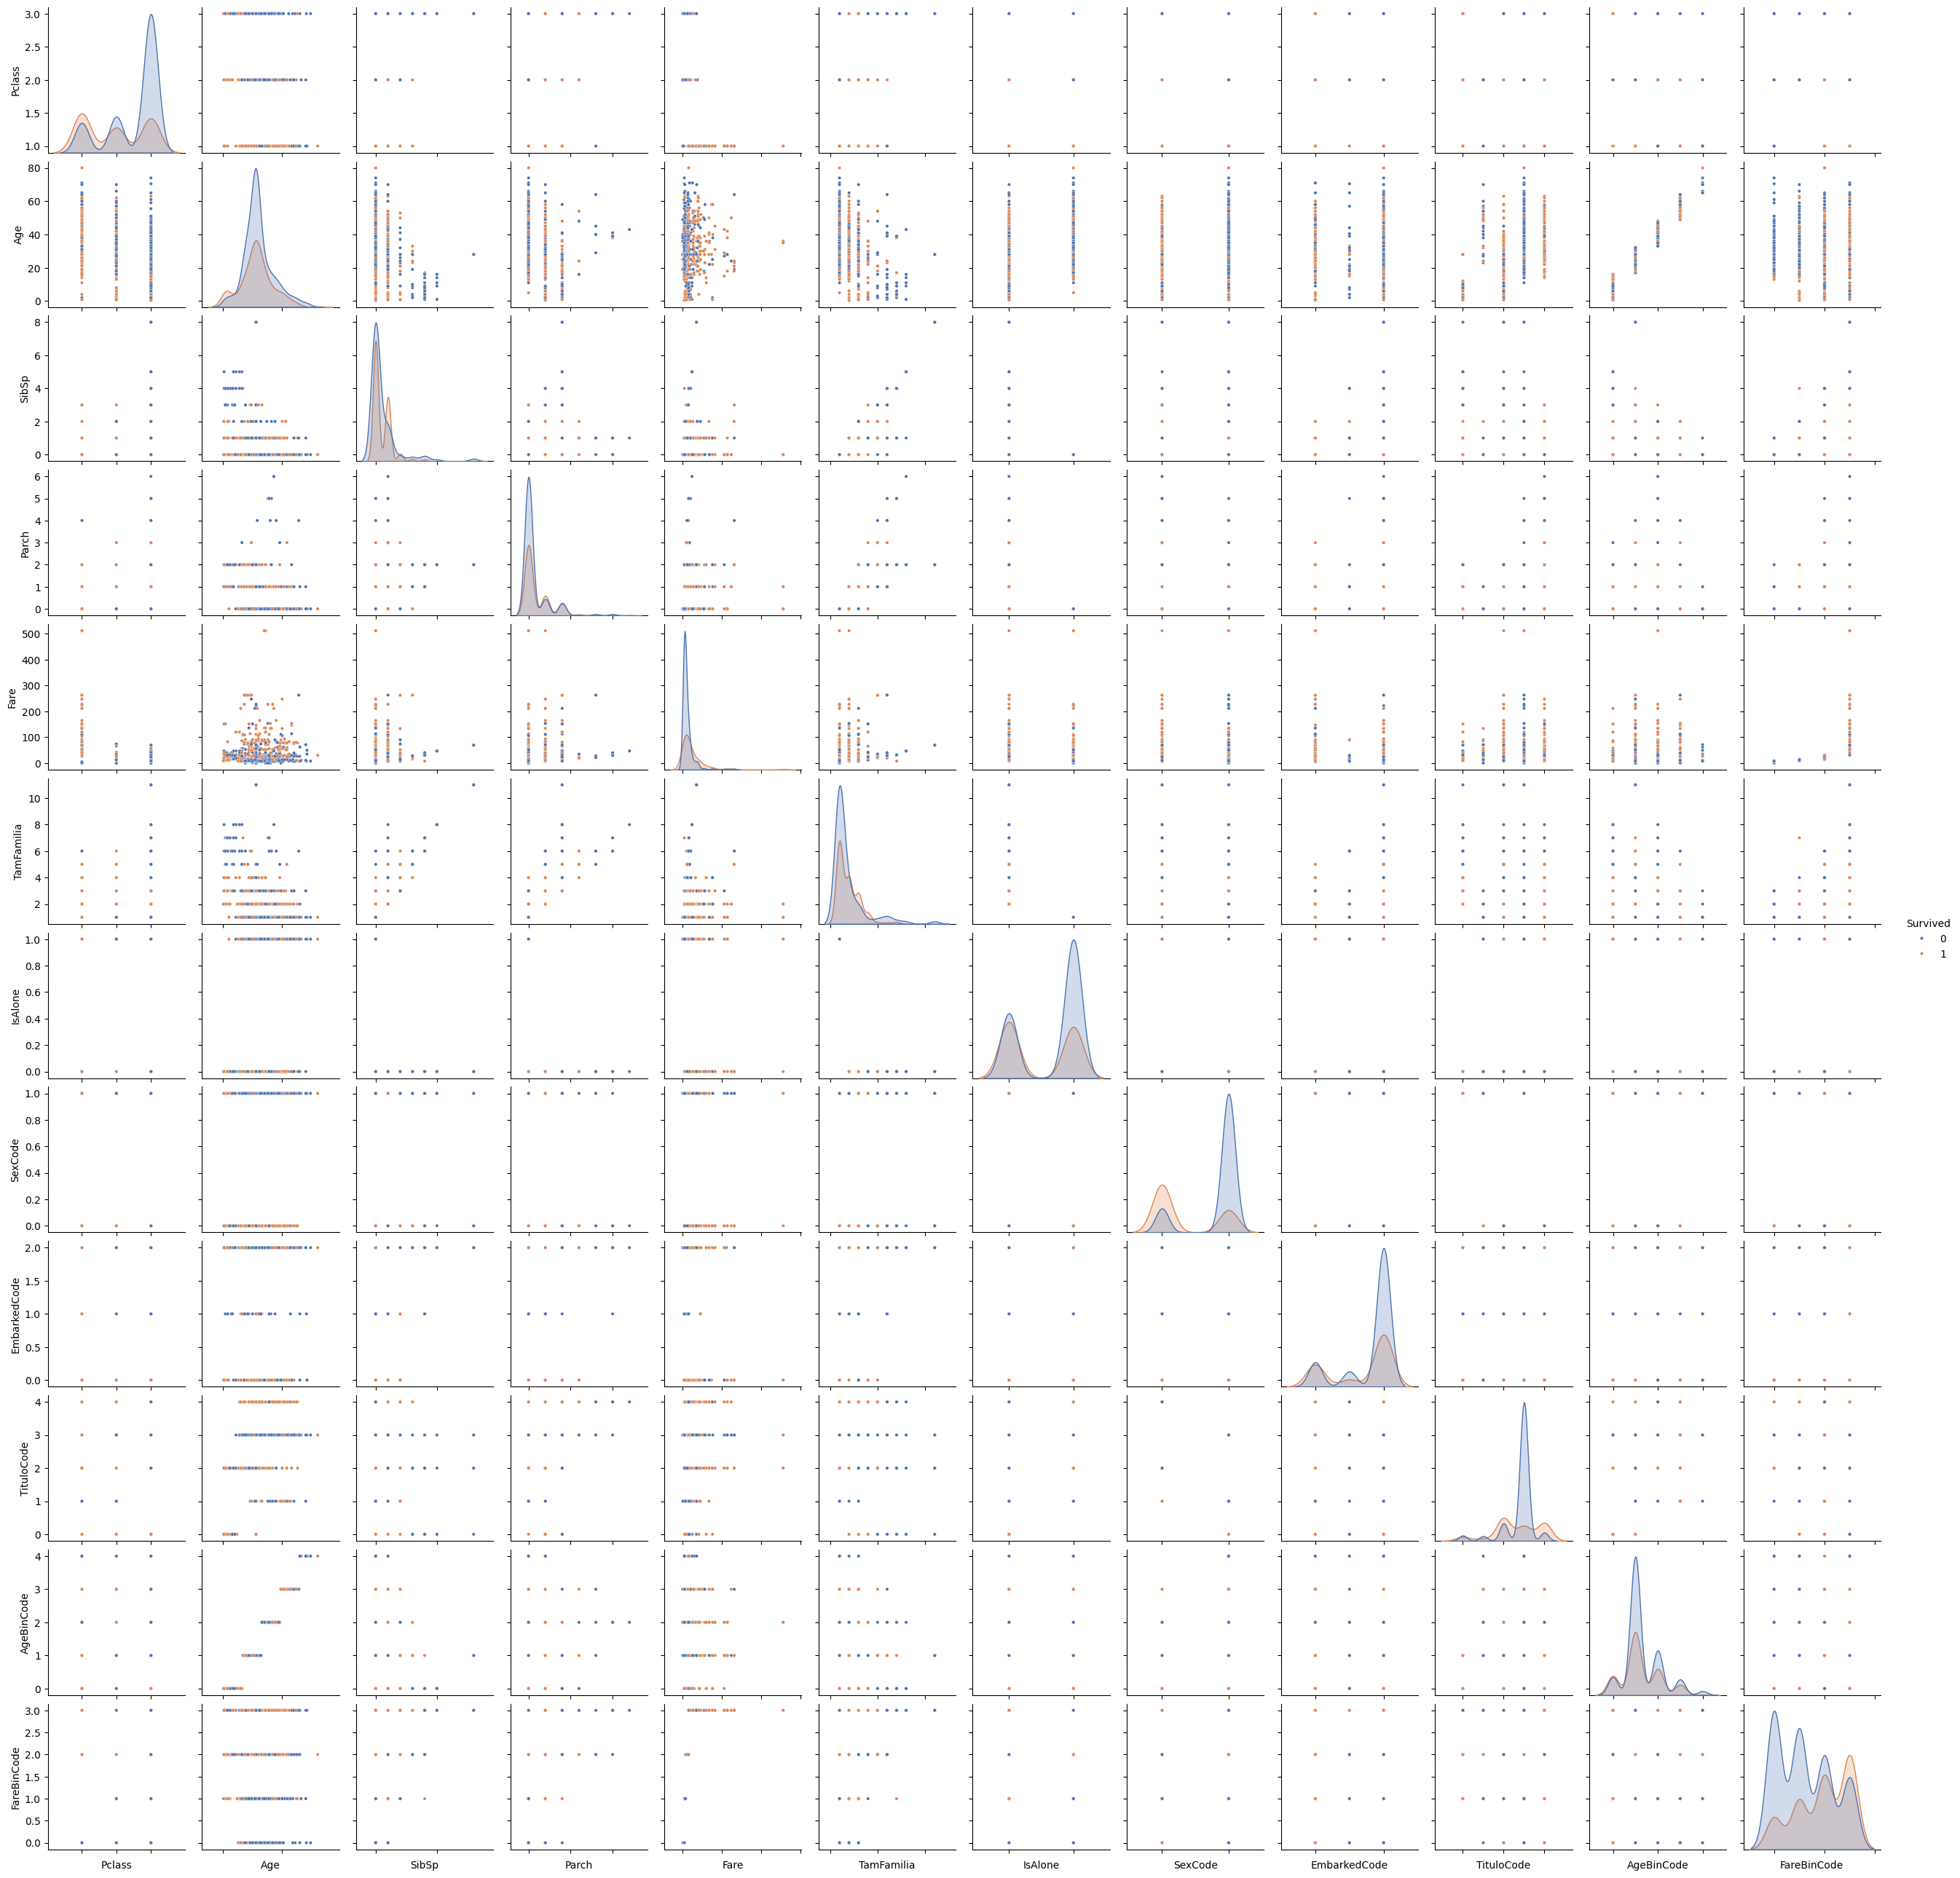

In [31]:
pp = sns.pairplot(data_copy, hue = 'Survived', palette = 'deep', height=2.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

In [47]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
        
    )
    
    plt.title('Matriz de correlación', y=1.05, size=15)

# correlation_heatmap(data_copy)

In [33]:
MLA = [
    #Métodos de ensamble
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Proceso gausiano
    gaussian_process.GaussianProcessClassifier(),
    
    #Modelos de Regresión
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Modelo Bayesiano
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Método de los vecinos más cercanos
    neighbors.KNeighborsClassifier(),
    
    #Máquinas de Vector Soporte
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Arboles de decisión
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Análisis discriminante lineal
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    #Extreme Gradient Boosting
    XGBClassifier()    
    ]

In [34]:
#Utilizamos model_selection.ShuffleSplit para producir índices para dividir los datos en conjuntos de entrenamiento y prueba.
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 )
cv_split

ShuffleSplit(n_splits=10, random_state=0, test_size=0.3, train_size=0.6)

In [35]:
#Definimos los headers con los que trabajaremos
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time


In [36]:
MLA_predict = data_copy[objetivo]
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time


In [37]:
row_index = 0
for alg in MLA:

    #definimos nombres y parámetros
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #modelo de puntuación con validación cruzada:
    cv_results = model_selection.cross_validate(alg, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #si se trata de una muestra aleatoria sin sesgo, entonces +/-3 desviaciones estándar (estándar) de la media
    #deberían capturar estadísticamente el 99,7 % de los subconjuntos
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    #guardamos las predicciones de MLA
    alg.fit(data_copy[data1_x_bin], data_copy[objetivo])
    MLA_predict[MLA_name] = alg.predict(data_copy[data1_x_bin])
    
    row_index+=1

    
#imprimimos y ordenamos la tabla
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.827612,0.040916,0.031275
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.826866,0.054656,0.032148
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.826119,0.069041,0.089132
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.826119,0.045663,0.027994
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.823507,0.05709,0.066193
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.822761,0.049873,0.069771
1,BaggingClassifier,"{'bootstrap': True, 'bootstrap_features': Fals...",0.821642,0.055022,0.014105
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.820522,0.059328,0.000113
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'estimator': None, 'l...",0.81194,0.049861,0.050131
5,GaussianProcessClassifier,"{'copy_X_train': True, 'kernel': None, 'max_it...",0.810448,0.049254,0.101857


Text(0, 0.5, 'Algoritmo')

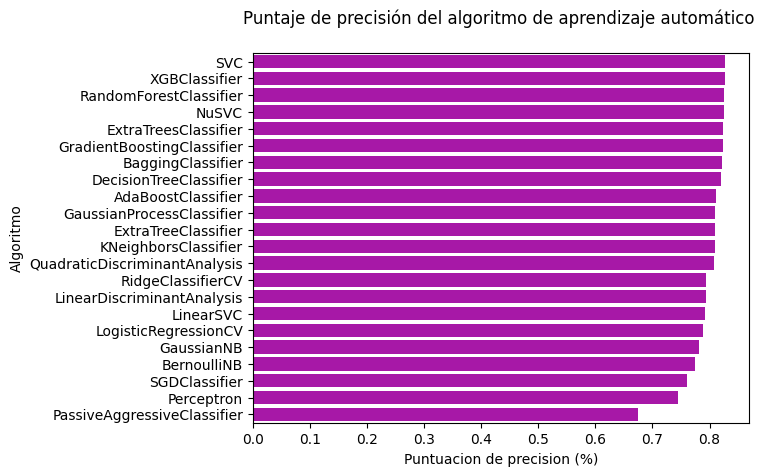

In [38]:
#Eficiencia de cada modelo

sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

plt.title('Puntaje de precisión del algoritmo de aprendizaje automático \n')
plt.xlabel('Puntuacion de precision (%)')
plt.ylabel('Algoritmo')

In [39]:
for  ix in data_copy.index:
    row=data_copy.loc[ix]
    
    #generamos números aleatorios en Random_Predict
    if random.random() > .5:     # numeros entre 0.0 <= x < 1.0   
        data_copy.loc[ix,'Random_Predict'] =1
    else: 
        data_copy.loc[ix,'Random_Predict'] =0    

#puntuación conjetura aleatoria de supervivencia. Utilice el método abreviado 1 = Suposición correcta y 0 = Suposición incorrecta. 
#La media de la columna será igual a la precisión.
data_copy['Random_Score'] = 0 #Asume la predicción
data_copy.loc[(data_copy['Survived'] == data_copy['Random_Predict']), 'Random_Score'] = 1 #Correcta predicción
print('Precisión del modelo Coin Flip: {:.2f}%'.format(data_copy['Random_Score'].mean()*100))

#también podemos usar la función precision_score de scikit para ahorrarnos algunas líneas de código
print('Precisión del modelo Coin Flip con SciKit: {:.2f}%'.format(metrics.accuracy_score(data_copy['Survived'], data_copy['Random_Predict'])*100))

Precisión del modelo Coin Flip: 48.93%
Precisión del modelo Coin Flip con SciKit: 48.93%


In [40]:
pivot_female = data_copy[data_copy.Sex=='female'].groupby(['Sex','Titulo'])['Survived'].mean()
print('Árbol de decisión de supervivencia con nodo femenino: \n',pivot_female)

pivot_male = data_copy[data_copy.Sex=='male'].groupby(['Sex','Titulo'])['Survived'].mean()
print('\n\nÁrbol de decisión de supervivencia con nodo masculino: \n',pivot_male)

Árbol de decisión de supervivencia con nodo femenino: 
 Sex     Titulo
female  Misc      1.000000
        Miss      0.697802
        Mrs       0.792000
Name: Survived, dtype: float64


Árbol de decisión de supervivencia con nodo masculino: 
 Sex   Titulo
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64


In [41]:
#https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/#Recall_Exhaustividad

def mytree(df):
    
   # inicializar tabla para almacenar predicciones
    Model = pd.DataFrame(data = {'Predict':[]})
    male_title = ['Master'] # títulos de sobrevivientes

    for index, row in df.iterrows():

         # Pregunta 1: ¿Estuviste en el Titanic; la mayoría murió
        Model.loc[index, 'Predict'] = 0

        # Pregunta 2: ¿Eres mujer? la mayoría sobrevivió
        if (df.loc[index, 'Sex'] == 'female'):
                  Model.loc[index, 'Predict'] = 1

              
        if ((df.loc[index, 'Sex'] == 'female') & 
            (df.loc[index, 'Pclass'] == 3) & 
            (df.loc[index, 'Embarked'] == 'S')  &
            (df.loc[index, 'Fare'] > 8)

           ):
                  Model.loc[index, 'Predict'] = 0 #Muere

        if ((df.loc[index, 'Sex'] == 'male') &
            (df.loc[index, 'Titulo'] in male_title)
            ):
            Model.loc[index, 'Predict'] = 1 #Vive
                
    return Model

Tree_Predict = mytree(data_copy)
print('Exactitud/puntuación de precisión del modelo del árbol de decisiones: {:.2f}%\n'.format(metrics.accuracy_score(data_copy['Survived'], Tree_Predict)*100))

print(metrics.classification_report(data_copy['Survived'], Tree_Predict))

Exactitud/puntuación de precisión del modelo del árbol de decisiones: 82.04%

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       549
           1       0.82      0.68      0.75       342

    accuracy                           0.82       891
   macro avg       0.82      0.79      0.80       891
weighted avg       0.82      0.82      0.82       891



Matriz de confusión, sin normalización
[[497  52]
 [108 234]]
Matriz de confusión normalizada
[[0.91 0.09]
 [0.32 0.68]]


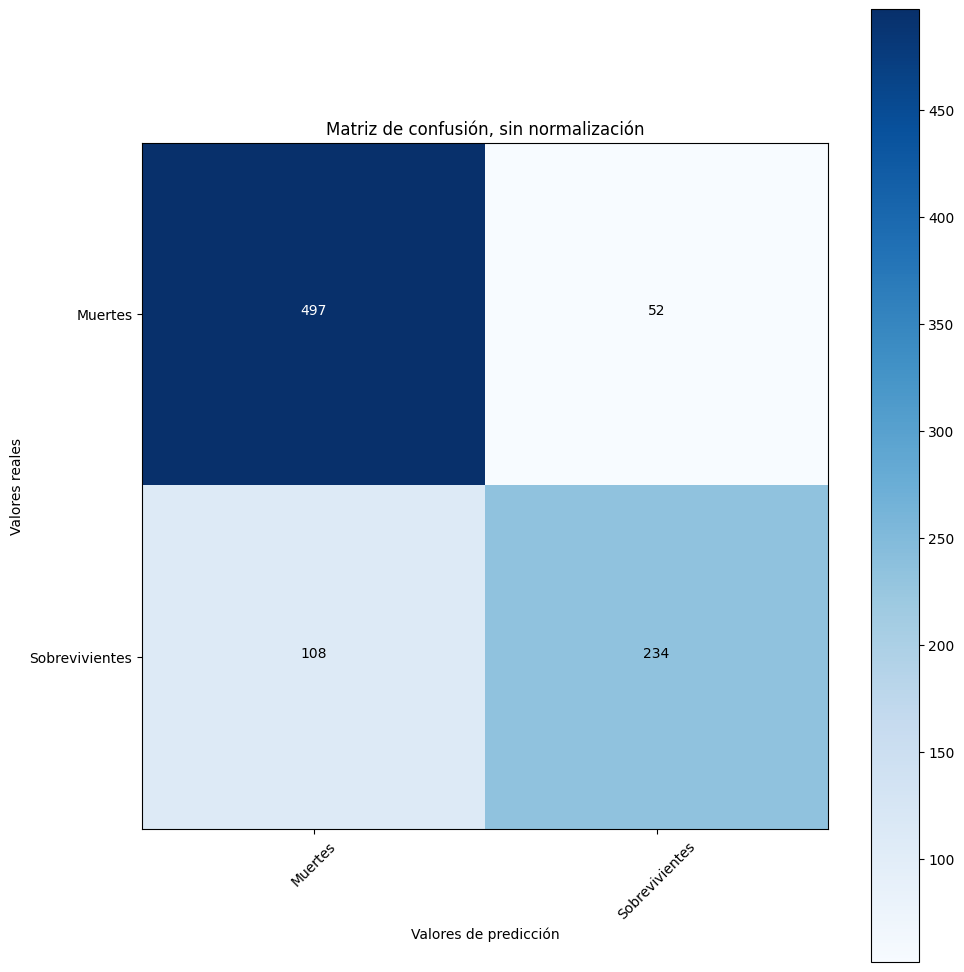

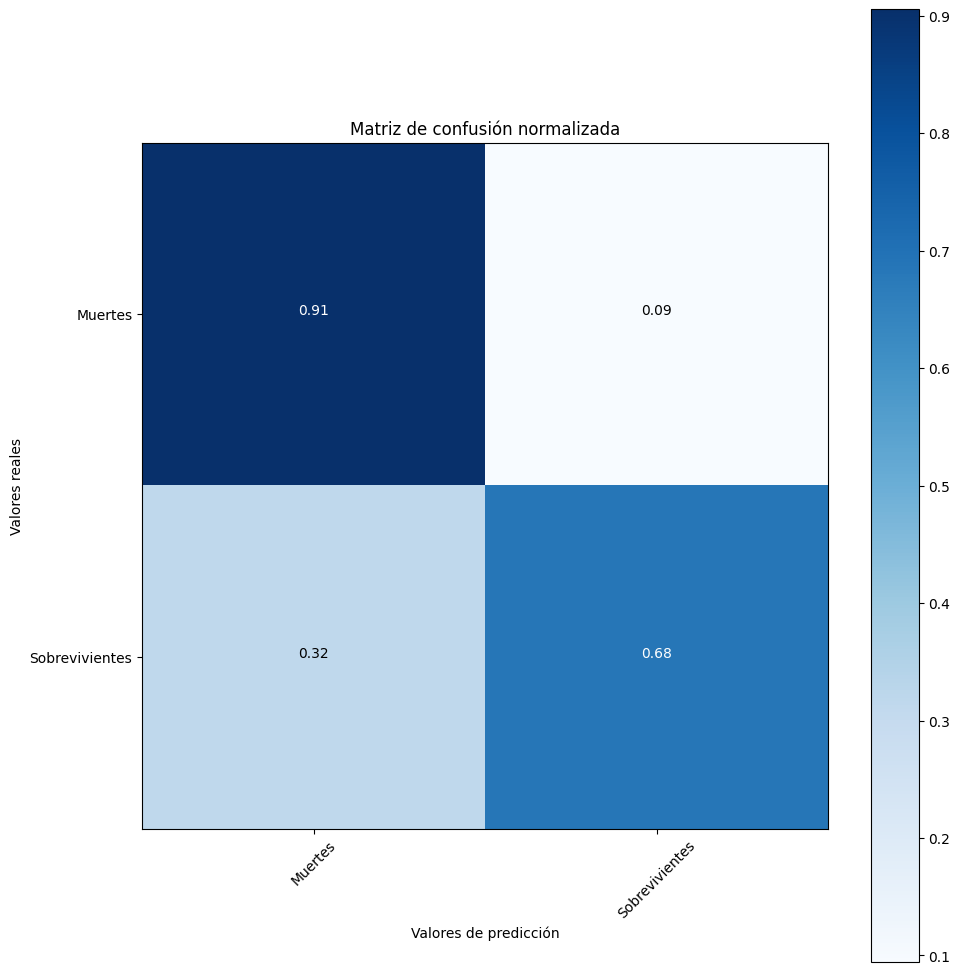

In [42]:
#Matriz de confución

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusion',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y traza la matriz de confusión.
    La normalización se puede aplicar estableciendo 'normalize=True.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusión normalizada")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Valores reales')
    plt.xlabel('Valores de predicción')

# Cálculo de la matriz de confusión
cnf_matrix = metrics.confusion_matrix(data_copy['Survived'], Tree_Predict)
np.set_printoptions(precision=2)

class_names = ['Muertes', 'Sobrevivientes']
# Matriz de confusión
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Matriz de confusión, sin normalización')

# Matriz de confusión normalizada
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Matriz de confusión normalizada')

In [43]:
dtree = tree.DecisionTreeClassifier(random_state = 0)
base_results = model_selection.cross_validate(dtree, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)
#Creemos un clasificador de árbol de decisiones a partir del conjunto de entrenamiento (x, y).
dtree.fit(data_copy[data1_x_bin], data_copy[objetivo])

print('Antes de los parámetros DT: ', dtree.get_params())
print("Antes de la prueba DT con media de puntuación bin: {:.2f}". format(base_results['test_score'].mean()*100))
print("Antes de la prueba DT con puntuación de bin 3 * std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))

print('-'*10)

#Entrenamos la data
param_grid = {'criterion': ['gini', 'entropy'], 

              'max_depth': [2,4,6,8,10,None], 

              'random_state': [0] 
             }

tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
tune_model.fit(data_copy[data1_x_bin], data_copy[objetivo])


print('Después de los parámetros DT: ', tune_model.best_params_)

print("Después de la prueba DT con media de puntuación bin: {:.2f}". format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("Después de la prueba DT con puntuación bin 3 * std: +/- {:.2f}". format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

Antes de los parámetros DT:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 0, 'splitter': 'best'}
Antes de la prueba DT con media de puntuación bin: 82.09
Antes de la prueba DT con puntuación de bin 3 * std: +/- 5.57
----------
Después de los parámetros DT:  {'criterion': 'gini', 'max_depth': 4, 'random_state': 0}
Después de la prueba DT con media de puntuación bin: 87.40
Después de la prueba DT con puntuación bin 3 * std: +/- 5.00
----------


In [44]:
#Imprimimos columnas sin entrenar
print('Antes de la prueba DT RFE: ', data_copy[data1_x_bin].shape) 
print('Antes de la prueba DT RFE Formación Columnas Antiguo: ', data_copy[data1_x_bin].columns.values)


print("Antes de la prueba DT RFE con la media de la puntuación del intervalo: {:.2f}". format(base_results['test_score'].mean()*100))
print("Antes de la prueba DT RFE con puntuación bin 3*std: +/- {:.2f}". format(base_results['test_score'].std()*100*3))
print('-'*10)

#selección de columnas y entrenamiento
dtree_rfe = feature_selection.RFECV(dtree, step = 1, scoring = 'accuracy', cv = cv_split)
dtree_rfe.fit(data_copy[data1_x_bin], data_copy[objetivo])

#transformamos x&y en características reducidas para adaptarse al nuevo modelo
X_rfe = data_copy[data1_x_bin].columns.values[dtree_rfe.get_support()]
rfe_results = model_selection.cross_validate(dtree, data_copy[X_rfe], data_copy[objetivo], cv  = cv_split)

print('Después de la forma de entrenamiento DT RFE Nuevo: ', data_copy[X_rfe].shape) 
print('Después de las columnas de entrenamiento DT RFE Nuevo: ', X_rfe)

print("Después de la prueba DT RFE con promedio de puntaje de bin: {:.2f}". format(rfe_results['test_score'].mean()*100))
print("Después de la prueba DT RFE con puntuación bin 3*std: +/- {:.2f}". format(rfe_results['test_score'].std()*100*3))
print('-'*10)


#Entrenamos el nuevo modelo con el metodo fit
rfe_tune_model = model_selection.GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5}), param_grid=param_grid, scoring = 'roc_auc', cv = cv_split)
rfe_tune_model.fit(data_copy[X_rfe], data_copy[objetivo])

print('Después de los parámetros elegidos DT RFE: ', rfe_tune_model.best_params_)

print("Después de la prueba DT RFE con promedio de puntaje de bin: {:.2f}". format(rfe_tune_model.cv_results_['mean_test_score'][tune_model.best_index_]*100))
print("Después de la prueba DT RFE con puntuación bin 3*std: +/- {:.2f}". format(rfe_tune_model.cv_results_['std_test_score'][tune_model.best_index_]*100*3))
print('-'*10)

Antes de la prueba DT RFE:  (891, 7)
Antes de la prueba DT RFE Formación Columnas Antiguo:  ['SexCode' 'Pclass' 'EmbarkedCode' 'TituloCode' 'TamFamilia' 'AgeBinCode'
 'FareBinCode']
Antes de la prueba DT RFE con la media de la puntuación del intervalo: 82.09
Antes de la prueba DT RFE con puntuación bin 3*std: +/- 5.57
----------
Después de la forma de entrenamiento DT RFE Nuevo:  (891, 6)
Después de las columnas de entrenamiento DT RFE Nuevo:  ['SexCode' 'Pclass' 'TituloCode' 'TamFamilia' 'AgeBinCode' 'FareBinCode']
Después de la prueba DT RFE con promedio de puntaje de bin: 83.06
Después de la prueba DT RFE con puntuación bin 3*std: +/- 6.22
----------
Después de los parámetros elegidos DT RFE:  {'criterion': 'entropy', 'max_depth': 8, 'random_state': 0}
Después de la prueba DT RFE con promedio de puntaje de bin: 85.93
Después de la prueba DT RFE con puntuación bin 3*std: +/- 6.36
----------


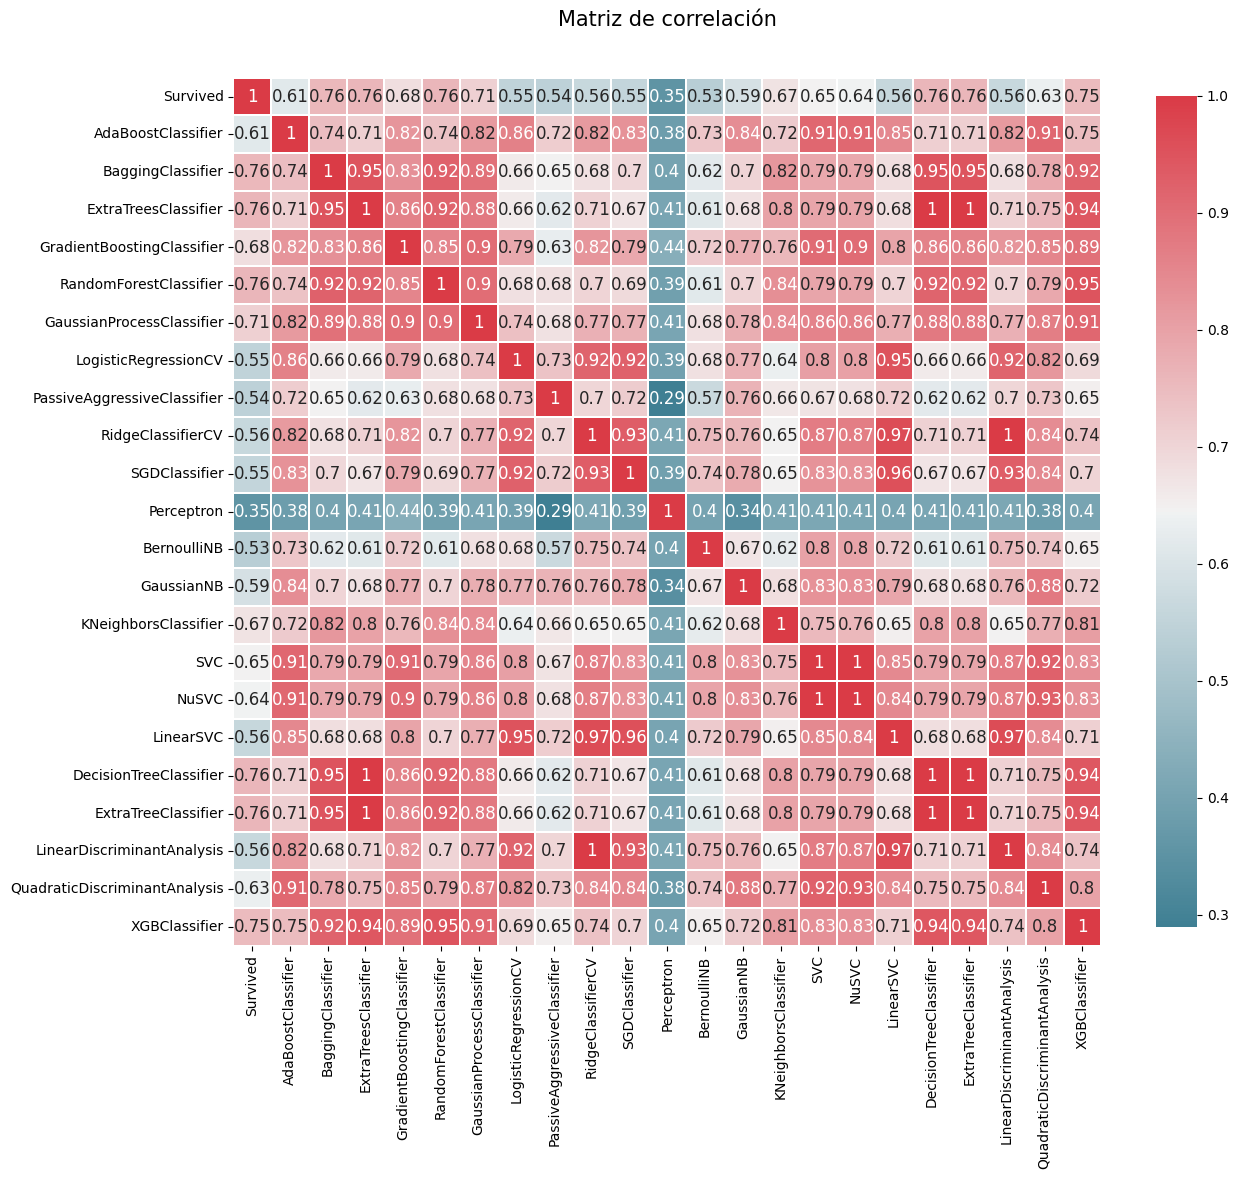

In [45]:
#Matriz de correlación

correlation_heatmap(MLA_predict)

In [46]:
vote_est = [
    #Meteodos de Ensable
    ('ada', ensemble.AdaBoostClassifier()),
    ('bc', ensemble.BaggingClassifier()),
    ('etc',ensemble.ExtraTreesClassifier()),
    ('gbc', ensemble.GradientBoostingClassifier()),
    ('rfc', ensemble.RandomForestClassifier()),

    #Proceso gausiano
    ('gpc', gaussian_process.GaussianProcessClassifier()),
    
    #Modelos de Regresión
    ('lr', linear_model.LogisticRegressionCV()),
    
    #Modelo Bayesiano
    ('bnb', naive_bayes.BernoulliNB()),
    ('gnb', naive_bayes.GaussianNB()),
    
    #Método de los vecinos más cercanos
    ('knn', neighbors.KNeighborsClassifier()),
    
    #Máquinas de Vector Soporte
    ('svc', svm.SVC(probability=True)),
    
    #Extreme Gradient Boosting
   ('xgb', XGBClassifier())

]


#Reglas de mayoría
vote_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
vote_hard_cv = model_selection.cross_validate(vote_hard, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)
vote_hard.fit(data_copy[data1_x_bin], data_copy[objetivo])


print("Prueba de votación de reglas de mayoría w/bin con promedio: {:.2f}". format(vote_hard_cv['test_score'].mean()*100))
print("Prueba de votación de reglas de mayoría w/bin con 3*std: +/- {:.2f}". format(vote_hard_cv['test_score'].std()*100*3))
print('-'*10)


#Probabilidades ponderadas
vote_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
vote_soft_cv = model_selection.cross_validate(vote_soft, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)
vote_soft.fit(data_copy[data1_x_bin], data_copy[objetivo])


print("Prueba de votación de probabilidades ponderadas w/bin con promedio:". format(vote_soft_cv['test_score'].mean()*100))
print("Prueba de votación de probabilidades ponderadas w/bin con 3*std: +/- {:.2f}". format(vote_soft_cv['test_score'].std()*100*3))
print('-'*10)

Prueba de votación de reglas de mayoría w/bin con promedio: 82.09
Prueba de votación de reglas de mayoría w/bin con 3*std: +/- 4.39
----------
Prueba de votación de probabilidades ponderadas w/bin con promedio:
Prueba de votación de probabilidades ponderadas w/bin con 3*std: +/- 4.98
----------


In [48]:
#Organización de hiperparámetros con GridSearchCV

grid_n_estimator = [10, 50, 100, 300]
grid_ratio = [.1, .25, .5, .75, 1.0]
grid_learn = [.01, .03, .05, .1, .25]
grid_max_depth = [2, 4, 6, 8, 10, None]
grid_min_samples = [5, 10, .03, .05, .10]
grid_criterion = ['gini', 'entropy']
grid_bool = [True, False]
grid_seed = [0]


grid_param = [
            [{
            #AdaBoostClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            'n_estimators': grid_n_estimator,
            'learning_rate': grid_learn,
            'random_state': grid_seed
            }],
       
    
            [{
            #BaggingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier
            'n_estimators': grid_n_estimator,
            'max_samples': grid_ratio,
            'random_state': grid_seed
             }],

    
            [{
            #ExtraTreesClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html#sklearn.ensemble.ExtraTreesClassifier
            'n_estimators': grid_n_estimator,
            'criterion': grid_criterion,
            'max_depth': grid_max_depth,
            'random_state': grid_seed
             }],


            [{
            #GradientBoostingClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
            'learning_rate': [.05],
            'n_estimators': [300],
            'max_depth': grid_max_depth,
            'random_state': grid_seed
             }],

    
            [{
            #RandomForestClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier
            'n_estimators': grid_n_estimator,
            'criterion': grid_criterion,
            'max_depth': grid_max_depth,
            'oob_score': [True],
            'random_state': grid_seed
             }],
    
            [{
            #GaussianProcessClassifier
            'max_iter_predict': grid_n_estimator, #por defecto: 100
            'random_state': grid_seed
            }],
        
    
            [{
            #LogisticRegressionCV - http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV
            'fit_intercept': grid_bool,
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'random_state': grid_seed
             }],
            
    
            [{
            #BernoulliNB - http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB
            'alpha': grid_ratio,
             }],

    
            #GaussianNB - 
            [{}],
    
    
            [{
            #KNeighborsClassifier - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
            'n_neighbors': [1,2,3,4,5,6,7],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
            }],
            
    
            [{
            #SVC - http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
            'C': [1,2,3,4,5],
            'gamma': grid_ratio,
            'decision_function_shape': ['ovo', 'ovr'],
            'probability': [True],
            'random_state': grid_seed
             }],

    
            [{
            #XGBClassifier - http://xgboost.readthedocs.io/en/latest/parameter.html
            'learning_rate': grid_learn, 
            'max_depth': [1,2,4,6,8,10],
            'n_estimators': grid_n_estimator, 
            'seed': grid_seed  
             }]   
        ]


start_total = time.perf_counter()
for clf, param in zip (vote_est, grid_param):

    start = time.perf_counter()        
    best_search = model_selection.GridSearchCV(estimator = clf[1], param_grid = param, cv = cv_split, scoring = 'roc_auc')
    best_search.fit(data_copy[data1_x_bin], data_copy[objetivo])
    run = time.perf_counter() - start

    best_param = best_search.best_params_
    print('El mejor parámetro para {} es {} con un tiempo de ejeción de {:.2f} segundos.'.format(clf[1].__class__.__name__, best_param, run))
    clf[1].set_params(**best_param) 


run_total = time.perf_counter() - start_total
print('El tiempo total de optimización fue {:.2f} minutos.'.format(run_total/60))

print('-'*10)

El mejor parámetro para AdaBoostClassifier es {'learning_rate': 0.1, 'n_estimators': 300, 'random_state': 0} con un tiempo de ejeción de 25.96 segundos.
El mejor parámetro para BaggingClassifier es {'max_samples': 0.25, 'n_estimators': 300, 'random_state': 0} con un tiempo de ejeción de 31.10 segundos.
El mejor parámetro para ExtraTreesClassifier es {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'random_state': 0} con un tiempo de ejeción de 36.30 segundos.
El mejor parámetro para GradientBoostingClassifier es {'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 300, 'random_state': 0} con un tiempo de ejeción de 47.21 segundos.
El mejor parámetro para RandomForestClassifier es {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 100, 'oob_score': True, 'random_state': 0} con un tiempo de ejeción de 61.67 segundos.
El mejor parámetro para GaussianProcessClassifier es {'max_iter_predict': 10, 'random_state': 0} con un tiempo de ejeción de 5.66 segundos.
El mejor pa

In [49]:
#Elección fija o reglas de mayoría con con hiperparámetros ajustados
grid_hard = ensemble.VotingClassifier(estimators = vote_est , voting = 'hard')
grid_hard_cv = model_selection.cross_validate(grid_hard, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)
grid_hard.fit(data_copy[data1_x_bin], data_copy[objetivo])


print("Elección fija con prueba de hiperparámetros organizados con la media: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))
print("Elección fija con prueba de hiperparámetros organizados con 3*std: +/- {:.2f}". format(grid_hard_cv['test_score'].std()*100*3))
print('-'*10)

#Elección flexible o probabilidades ponderadas con hiperparámetros ajustados
grid_soft = ensemble.VotingClassifier(estimators = vote_est , voting = 'soft')
grid_soft_cv = model_selection.cross_validate(grid_soft, data_copy[data1_x_bin], data_copy[objetivo], cv  = cv_split)
grid_soft.fit(data_copy[data1_x_bin], data_copy[objetivo])


print("Elección flexible con prueba de hiperparámetros organizados con la media: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))
print("Elección flexible con prueba de hiperparámetros organizados con 3*std: +/- {:.2f}". format(grid_soft_cv['test_score'].std()*100*3))
print('-'*10)

Elección fija con prueba de hiperparámetros organizados con la media: 82.43
Elección fija con prueba de hiperparámetros organizados con 3*std: +/- 4.43
----------
Elección flexible con prueba de hiperparámetros organizados con la media: 82.39
Elección flexible con prueba de hiperparámetros organizados con 3*std: +/- 5.61
----------


In [50]:
#Preparamos la data para el modelo
print(data_test.info())
print("-"*10)

#Mostramos los resultados y los convertimos a enteros
data_test['Survived'] = mytree(data_test).astype(int)
data_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   418 non-null    int64   
 1   Pclass        418 non-null    int64   
 2   Name          418 non-null    object  
 3   Sex           418 non-null    object  
 4   Age           418 non-null    float64 
 5   SibSp         418 non-null    int64   
 6   Parch         418 non-null    int64   
 7   Ticket        418 non-null    object  
 8   Fare          418 non-null    float64 
 9   Cabin         91 non-null     object  
 10  Embarked      418 non-null    object  
 11  TamFamilia    418 non-null    int64   
 12  IsAlone       418 non-null    int64   
 13  Titulo        418 non-null    object  
 14  FareBin       418 non-null    category
 15  AgeBin        418 non-null    category
 16  SexCode       418 non-null    int64   
 17  EmbarkedCode  418 non-null    int64   
 18  TituloCode

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,IsAlone,Titulo,FareBin,AgeBin,SexCode,EmbarkedCode,TituloCode,AgeBinCode,FareBinCode,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,...,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,...,1,Dona,"(31.472, 512.329]","(30.4, 45.6]",0,0,1,2,3,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,...,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,2,5,2,0,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,...,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1,0


In [51]:
data_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,IsAlone,Titulo,FareBin,AgeBin,SexCode,EmbarkedCode,TituloCode,AgeBinCode,FareBinCode,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,Mr,"(-0.001, 7.896]","(30.4, 45.6]",1,1,5,2,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,0,Mrs,"(-0.001, 7.896]","(45.6, 60.8]",0,2,6,3,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,1,Mr,"(7.896, 14.454]","(60.8, 76.0]",1,1,5,4,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,Mr,"(7.896, 14.454]","(15.2, 30.4]",1,2,5,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,0,Mrs,"(7.896, 14.454]","(15.2, 30.4]",0,2,6,1,1,0
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,...,1,Mr,"(7.896, 14.454]","(-0.076, 15.2]",1,2,5,0,1,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,...,1,Miss,"(-0.001, 7.896]","(15.2, 30.4]",0,1,4,1,0,1
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,...,0,Mr,"(14.454, 31.472]","(15.2, 30.4]",1,2,5,1,2,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,...,1,Mrs,"(-0.001, 7.896]","(15.2, 30.4]",0,0,6,1,0,1
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,...,0,Mr,"(14.454, 31.472]","(15.2, 30.4]",1,2,5,1,2,0


In [52]:
submit = data_test[['PassengerId','Survived']]
submit.to_csv("resultado_prediccion.csv", index=False)

print('Conteo de datos validados: \n', data_test['Survived'].value_counts(normalize = True))
submit

Conteo de datos validados: 
 Survived
0    0.662679
1    0.337321
Name: proportion, dtype: float64


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
